In [2]:
import matplotlib.pyplot as plot
import matplotlib.image as image
import numpy as np

In [3]:
class Image:
  def __init__(self, matrix, height, width, gray_level):
    self.matrix = matrix
    self.height = height
    self.width = width
    self.gray_level = gray_level

In [4]:
def readpgm(name) -> Image:
  with open(name, "r") as f:

    assert f.readline() ==  'P2\n'
    line = f.readline()
    while (line[0] == '#'):
      line = f.readline()

    (width, height) = [int(i) for i in line.split()]
    print (width, height)
    depth = int(f.readline())
    assert depth <= 255
    print (depth)


    img = []
    row = []
    j = 0
    for line in f:
      values = line.split()
      for val in values:
        row.append (int (val))
        j = j + 1
        if j >= width:
          img.append (row)
          j=0
          row = []
    pic = Image(matrix=img, height=height, width=width, gray_level=depth)    

  return pic

In [5]:
img = readpgm("img.pgm")

1024 683
255


In [6]:
print (np.asarray (img.matrix))

[[21 21 21 ... 28 28 28]
 [21 21 21 ... 28 28 28]
 [21 21 21 ... 28 28 28]
 ...
 [61 61 62 ... 85 84 83]
 [61 62 63 ... 85 84 82]
 [62 63 64 ... 86 84 81]]


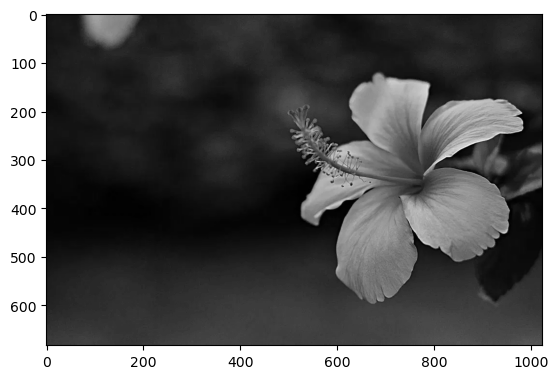

In [7]:
plot.imshow(img.matrix, cmap='gray')
plot.show()

Transformation vectors
- Negative
- Nth power

In [8]:
gl = img.gray_level
T_neg = []
for i in range(gl+1):
  T_neg.insert(i,gl - i)


T_power = []
for i in range(gl+1):
  T_power.insert(i, pow(img[i][j], 2)/ pow(255, 2) * 255)

In [10]:
img_neg = np.zeros((img.width, img.height))
img_pow = np.zeros((img.width, img.height))
img_root = np.zeros((img.width, img.height))

for i in range(img.width): 
  for j in range(img.height):
    img_neg[i][j] = T_neg[img.matrix[i][j]]
    img_pow[i][j] = pow(img[i][j], 2)/ pow(255, 2) * 255
    img_root[i][j] = pow(img[i][j], .5)/ pow(255, .5) * 255

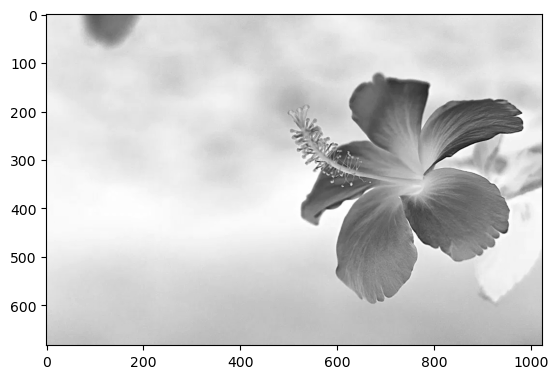

In [11]:
plot.imshow(img_neg, cmap='gray')
plot.show()

In [ ]:
plot.imshow(img_pow, cmap='gray')
plot.show()

In [ ]:
plot.imshow(img_root, cmap='gray')
plot.show()